<a href="https://colab.research.google.com/github/ShubhamJain2798/Spotify-Popularity-Analysis-/blob/master/Spotify_dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install regressors


import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
plt.style.use('bmh')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from matplotlib.lines import Line2D
from regressors import stats   
from wordcloud import WordCloud, STOPWORDS

  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12400 sha256=8670008fe8d7d8b2219145e7ed7a44c4f286e1aa7720902c9816d82352af8827
  Stored in directory: /root/.cache/pip/wheels/5e/84/7d/c7f674a24c508709cdd3aa6cf0f129899f21061b2821ceed32
Successfully built regressors


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ShubhamJain2798/GIT_practice/master/spotify_dataset.csv", index_col= 'Index', parse_dates=['Release Date'])  # Making the 'Index' column as index
df.head()
#df.shape

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [ ]:
df["Streams"] = df["Streams"].str.replace(",","").astype(int) #Removed commas and converted streams to string type

In [ ]:
# removing Song ID's with empty values
df.drop(df[df['Song ID'] == ' '].index , inplace = True)
df.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [ ]:
df.shape        

(1545, 22)

In [ ]:
# Checking if there are Song ID with multiple occurences 
df['Song ID'].dropna().value_counts().head(28)

5uEYRdEIh9Bo4fpjDd4Na9    3
4lUmnwRybYH7mMzf16xB0y    2
37BZB0z9T8Xu7U3e65qxFy    2
73O30uMI7n6DuzBmbtO7kC    2
0t3ZvGKlmYmVsDzBJAXK8C    2
5VwwpU7KsLhgfbMEecedhJ    2
07Oz5StQ7GRoygNLaXs2pd    2
02kDW379Yfd5PzW5A6vuGt    2
1D3z6HTiQsNmZxjl7F7eoG    2
0e6NlGJxYlHvAN8SKxad7N    2
2MbdDtCv5LUVjYy9RuGTgC    2
1SV1fxF65n9NhRHp3KlBuu    2
35UUpTmrcFXNIVIN26ujXl    2
6uvMKqNlrSvcC4NaKnrwjZ    2
2AlYncTpVHKwHb55F9lF6O    2
3yZCjDTxzZxx1kll1sRjGc    2
7ygpwy2qP3NbrxVkHvUhXY    2
4umIPjkehX1r7uhmGvXiSV    2
27RSJHEA99Y0Vsow7nA37A    2
1WedZeiezCmCEOzLwhx0hV    2
2YpeDb67231RjR0MgVLzsG    2
1iQDltZqI7BXnHrFy4Qo1k    2
4S2uhQE8L9V6p7rj7SiauJ    2
0oQc0F6KUE7QY7k5TU6bic    2
463CkQjx2Zk1yXoBuierM9    2
7wsmIIm0xWmtP7TmACXkJn    2
0GzuHFG4Ql6DoyxFRnIk3F    2
4ZRrLHqzhGRXYj2qcB4s5S    2
Name: Song ID, dtype: int64

In [ ]:
# the above song ID have appeared twice and thrice, therefore removing the duplicate ID's 

# checking for a particular song 
df[df['Song ID'] == '5uEYRdEIh9Bo4fpjDd4Na9']

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,,
85,32,28,2021-04-30--2021-05-07,Goosebumps - Remix,7452633,"Travis Scott, HVME",17719446,5uEYRdEIh9Bo4fpjDd4Na9,"['rap', 'slap house']",2021-01-15,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,87,0.841,0.593,-7.846,0.0379,0.418,0.124,124.917,162803,0.808,C#/Db
145,13,83,2020-04-24--2020-05-01,goosebumps,5691540,Travis Scott,17719446,5uEYRdEIh9Bo4fpjDd4Na9,"['rap', 'slap house']",2021-01-15,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,87,0.841,0.593,-7.846,0.0379,0.418,0.124,124.917,162803,0.808,C#/Db
408,33,24,2021-01-08--2021-01-15,Goosebumps,5496962,HVME,17719446,5uEYRdEIh9Bo4fpjDd4Na9,"['rap', 'slap house']",2021-01-15,2021-04-23--2021-04-30\n2021-04-16--2021-04-23...,87,0.841,0.593,-7.846,0.0379,0.418,0.124,124.917,162803,0.808,C#/Db


In [ ]:
# removing duplicate songs
df = df.drop_duplicates(subset = 'Song ID').reset_index(drop = True)   # we have to put in a different data set because of reset index
df.shape

(1516, 22)

In [ ]:
# converting the Song name to lower case
df['Song Name'] = df["Song Name"].str.lower()
df.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,2021-07-23--2021-07-30,beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,3,2021-07-23--2021-07-30,stay (with justin bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,3,5,2021-07-02--2021-07-09,bad habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,1,2021-07-23--2021-07-30,industry baby (feat. jack harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [ ]:
# COnverting '[]' in genre to 'NULL'

df["Genre"].astype(str)
df["Genre"][df["Genre"]=="[]"] = 'NULL'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
 # Converting object datatypes to float
 
 df[["Popularity","Danceability","Energy","Loudness","Speechiness","Acousticness","Liveness","Tempo","Duration (ms)", "Valence"]] = df[["Popularity","Danceability","Energy","Loudness","Speechiness","Acousticness","Liveness","Tempo","Duration (ms)", "Valence"]].astype(float)

In [ ]:
# df2['year'] = pd.to_datetime(df2['Release Date']).dt.to_period('Y')
x = df.apply(lambda row : len(row["Release Date"]), axis = 1)
print(set(x))

  


{10, 4, 7}


In [ ]:
def format_date(date_string):
  if len(date_string) == 10:
    date_string = time.mktime(datetime.datetime.strptime(date_string,"%Y-%m-%d").timetuple())
    return(date_string)
  if len(date_string) == 7:
    date_string = time.mktime(datetime.datetime.strptime(date_string,"%Y-%m").timetuple())
    return(date_string)
  if len(date_string) == 4:
    date_string = time.mktime(datetime.datetime.strptime(date_string,"%Y").timetuple())
    return(date_string)
  

df['timestamp_reldate'] = df.apply(lambda row : format_date(row['Release Date']), axis = 1)
df["timestamp_reldate"]

0       1.512691e+09
1       1.625789e+09
2       1.621555e+09
3       1.624579e+09
4       1.626998e+09
            ...     
1511    1.496362e+09
1512    1.570752e+09
1513    1.515715e+09
1514    1.569370e+09
1515    1.573603e+09
Name: timestamp_reldate, Length: 1516, dtype: float64

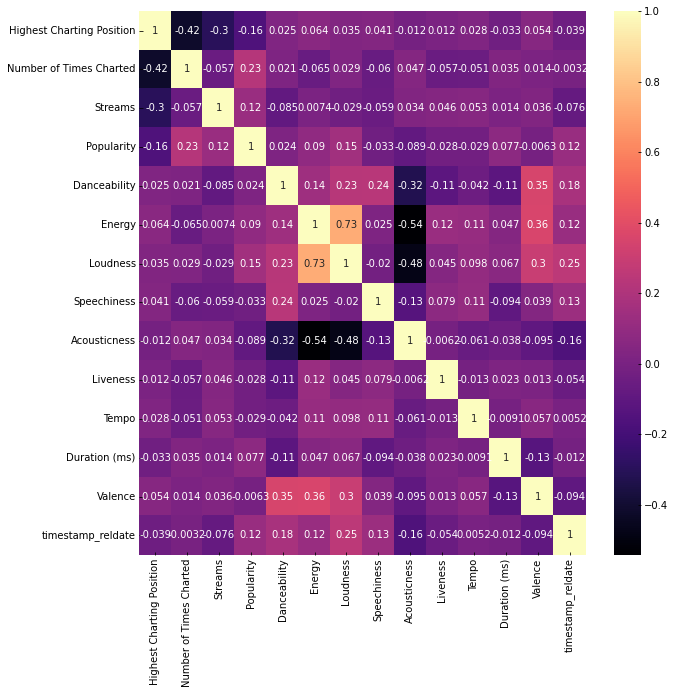

In [ ]:
correlation_matrix = df.corr()
# sn.heatmap(df.corr())
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, cmap="magma", annot=True)

count    1516.000000
mean       69.955805
std        15.889346
min         0.000000
25%        65.000000
50%        73.000000
75%        79.250000
max       100.000000
Name: Popularity, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


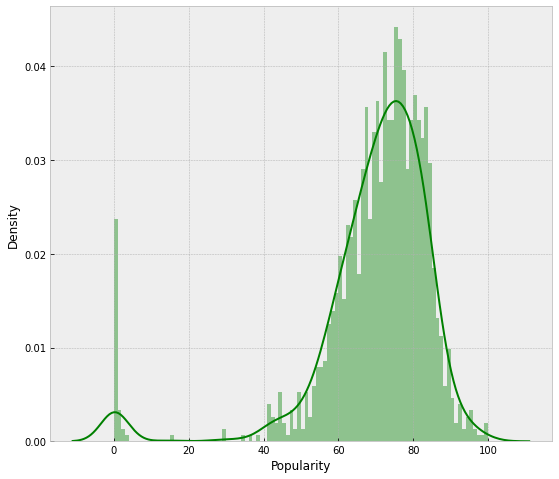

In [ ]:
print(df['Popularity'].describe())

#checking the target variable trend, looks almost normal with outliers being the sings with 0 popularity
plt.figure(figsize=(9, 8))
sns.distplot(df['Popularity'], color='g', bins=100, hist_kws={'alpha': 0.4});

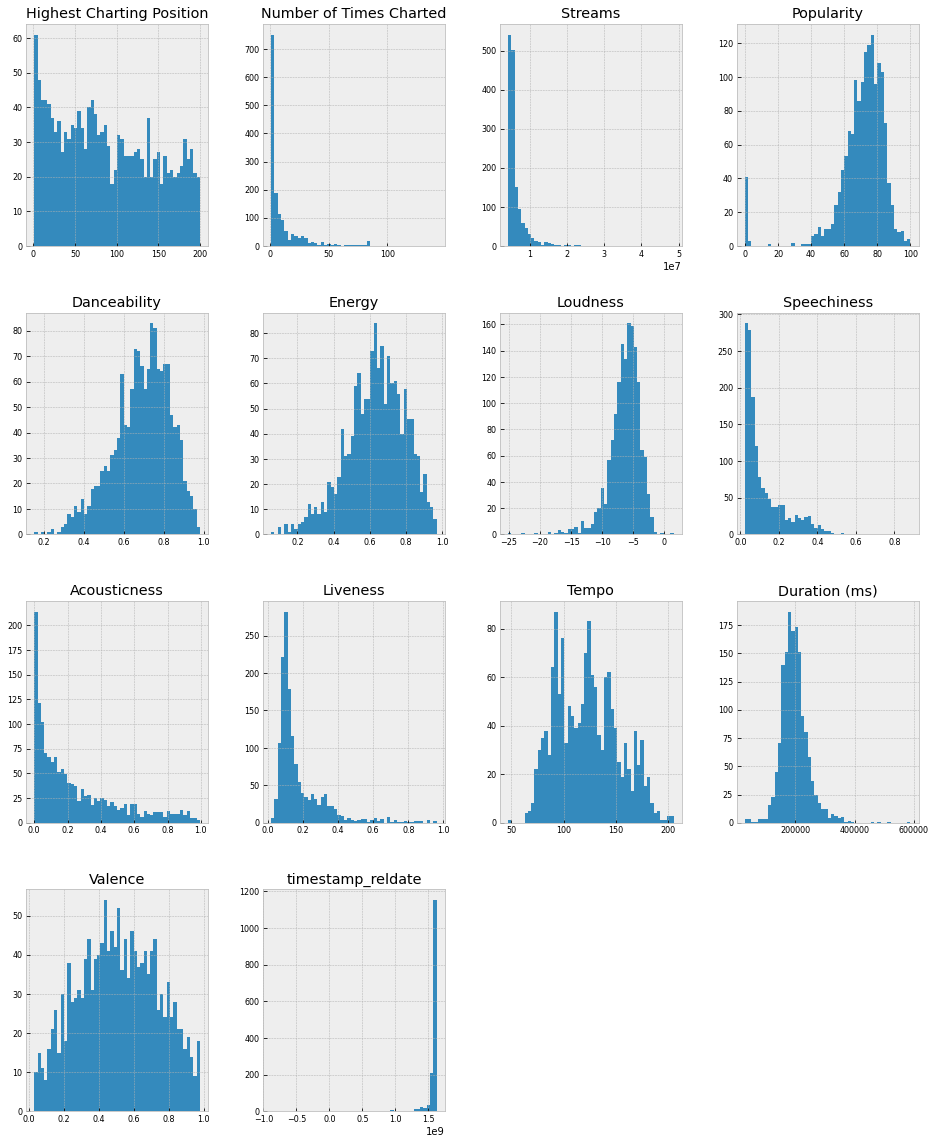

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

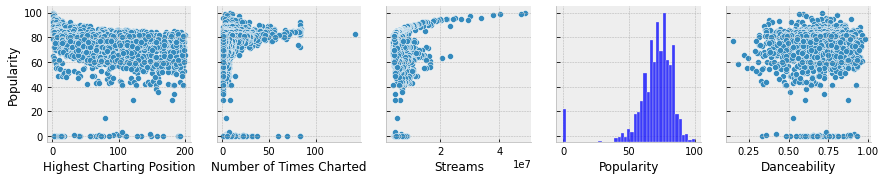

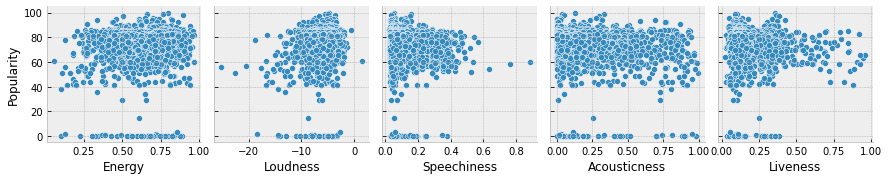

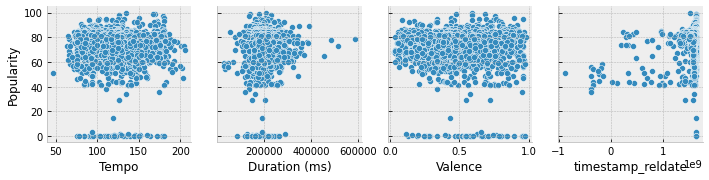

In [ ]:
#checking all variables' relationship with Popularity other than correlation
#checking all variables' relationship with Popularity other than correlation

for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Popularity'])

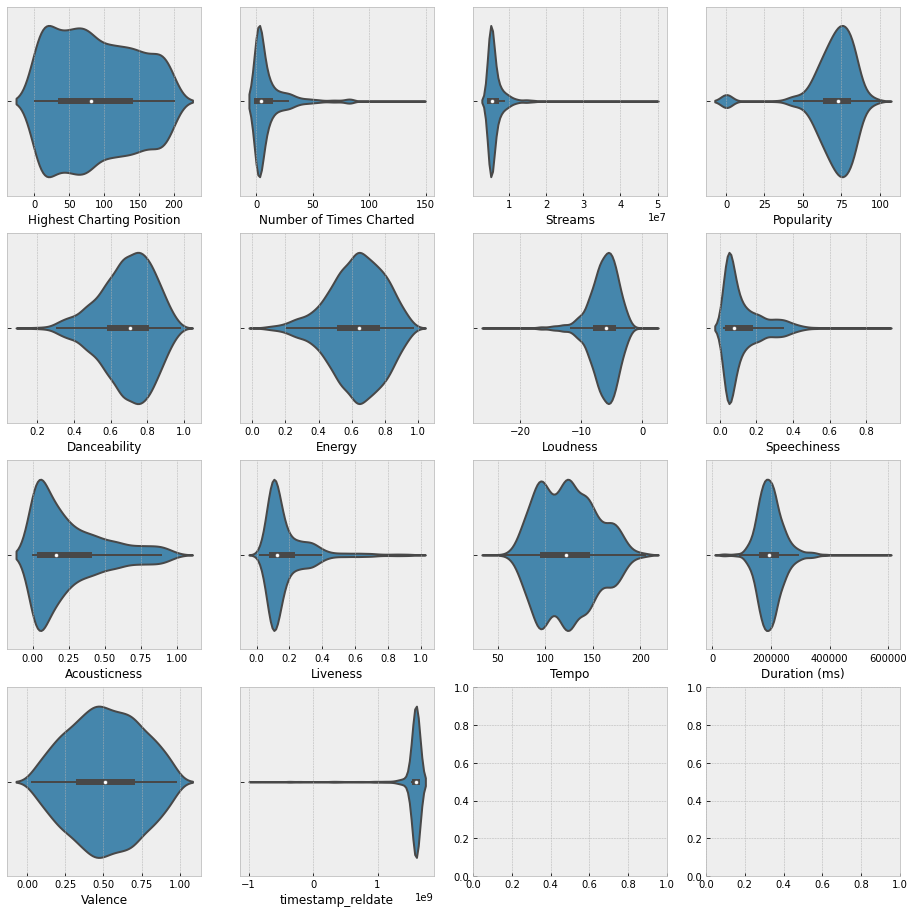

In [ ]:
fig, ax = plt.subplots(4,4, figsize=(16,16))
i=0
for row in range(4):
  for col in range(4):
    if i<len(df_num.columns):
      sns.violinplot(data=df_num,x=df_num.columns[i], ax=ax[row,col])
      i = i+1
    else:
      break

In [ ]:
# Multiple linear regression
np.random.seed(31415)


x = df[["Danceability","Energy","Streams","Highest Charting Position","Loudness","Speechiness","Acousticness","Liveness","Tempo","Duration (ms)","Valence","timestamp_reldate"]]  
y = df["Popularity"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Check VIF:

x_temp = sm.add_constant(x_train)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1)) #no multicollinearity observed

# Running multiple regression model

model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
y_pred = model.predict(sm.add_constant(x_test))
model.summary()


    VIF Factor                   features
0        258.0                      const
1          1.5               Danceability
2          2.8                     Energy
3          1.1                    Streams
4          1.1  Highest Charting Position
5          2.4                   Loudness
6          1.2                Speechiness
7          1.7               Acousticness
8          1.0                   Liveness
9          1.1                      Tempo
10         1.1              Duration (ms)
11         1.5                    Valence
12         1.2          timestamp_reldate


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     7.060
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           1.57e-12
Time:                        22:14:58   Log-Likelihood:                -5012.3
No. Observations:                1212   AIC:                         1.005e+04
Df Residuals:                    1199   BIC:                         1.012e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        69.4040      7.018      9.889      0.000      55.635      83.173
Danceability                 -1.3892      3.793     -0.366      0.714      -8.830       6.052
Energy                        0.2354      4.537      0.052      0.959      -8.666       9.137
Streams                    3.945e-07   1.59e-07      2.486      0.013    8.32e-08    7.06e-07
Highest Charting Position    -0.0368      0.008     -4.626      0.000      -0.052      -0.021
Loudness                      0.8881      0.271      3.281      0.001       0.357       1.419
Speechiness                  -0.3857      4.305     -0.090      0.929      -8.832       8.060
Acousticness                 -0.0420      2.249     -0.019      0.985      -4.454       4.370
Liveness                     -3.1182      3.228     -0.966      0.334      -9.452       3.216
Tempo                        -0.0120      0.015     -0.787      0.431      -0.042       0.018
Duration (ms)               2.12e-05   9.95e-06      2.130      0.033    1.67e-06    4.07e-05
Valence                      -1.9807      2.351     -0.843      0.400      -6.593       2.632
timestamp_reldate           4.49e-09   1.89e-09      2.376      0.018    7.82e-10     8.2e-09
==============================================================================
Omnibus:                      738.721   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6926.942
Skew:                          -2.748   Prob(JB):                         0.00
Kurtosis:                      13.343   Cond. No.                     2.83e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Not used this function due to ambiguity in x and y axis scales


# Function for plots of actual and predicted values for different algorithms:

def results_plots(prediction,title):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(x=x_test.index,y=y_test, color='blue', label='Actual')
    ax.scatter(x=x_test.index, y=prediction, color='red', label='Predicted')
    legends = [Line2D([0], [0], marker='o', color='w', label='Actual',
                          markerfacecolor='blue', markersize=15),
           Line2D([0], [0], marker='o', color='w', label='Predicted',
                          markerfacecolor='red', markersize=15)]

    ax.legend(handles=legends)
    plt.title(title)
    plt.show()


    


In [ ]:
# Multiple linear regression

x = df[["Danceability","Energy","Streams","Highest Charting Position","Loudness","Speechiness","Acousticness","Liveness","Tempo","Duration (ms)","Valence","timestamp_reldate"]]  
y = df["Popularity"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Check VIF:

x_temp = sm.add_constant(x_train)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1)) #no multicollinearity observed

# Running multiple regression model

model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
y_pred = model.predict(sm.add_constant(x_test))
print(model.summary())  # R2 value = 0.079



    VIF Factor                   features
0        256.3                      const
1          1.5               Danceability
2          2.7                     Energy
3          1.1                    Streams
4          1.1  Highest Charting Position
5          2.4                   Loudness
6          1.2                Speechiness
7          1.7               Acousticness
8          1.1                   Liveness
9          1.1                      Tempo
10         1.0              Duration (ms)
11         1.5                    Valence
12         1.2          timestamp_reldate
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     7.386
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           3.10e-13
Time:            

In [ ]:
# Function to display p values and coefficients for Lasso and Ridge regression

def regression_results(coef, p_value):

  regression_results = pd.DataFrame()
  regression_results["Columns"] = x_train.columns
  regression_results["Coefficients"] = pd.Series(coef)
  regression_results["p Value"] = pd.Series(p_value[1:])
  print(regression_results)

In [ ]:
# Lasso regression:

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)
print("R square value for Lasso regression is {}".format(lasso_model.score(x_train, y_train)) )
y_lasso = lasso_model.predict(x_test)



# Plot test scores and significant variables:

regression_results(lasso_model.coef_,stats.coef_pval(lasso_model, x_train, y_train))

#stats.summary(lasso_model, x_train, y_train)
#stats.coef_pval(lasso_model, x_train, y_train)

R square value for Lasso regression is 0.06536139157190235
                      Columns  Coefficients   p Value
0                Danceability -0.000000e+00  1.000000
1                      Energy  0.000000e+00  1.000000
2                     Streams  5.233110e-07  0.000009
3   Highest Charting Position -3.003927e-02  0.000105
4                    Loudness  5.214532e-01  0.002889
5                 Speechiness -0.000000e+00  1.000000
6                Acousticness -0.000000e+00  1.000000
7                    Liveness -0.000000e+00  1.000000
8                       Tempo -2.501418e-02  0.069186
9               Duration (ms)  2.087950e-05  0.009062
10                    Valence -0.000000e+00  1.000000
11          timestamp_reldate  7.787185e-09  0.000000


In [ ]:
# Ridge regression:

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
print("R square value for Ridge regression is {}".format(ridge_model.score(x_train, y_train)) )
y_ridge = ridge_model.predict(x_test)

# Plot test scores and significant variables:

regression_results(lasso_model.coef_,stats.coef_pval(lasso_model, x_train, y_train))

R square value for Ridge regression is 0.06882828552416798
                      Columns  Coefficients   p Value
0                Danceability -0.000000e+00  1.000000
1                      Energy  0.000000e+00  1.000000
2                     Streams  5.233110e-07  0.000009
3   Highest Charting Position -3.003927e-02  0.000105
4                    Loudness  5.214532e-01  0.002889
5                 Speechiness -0.000000e+00  1.000000
6                Acousticness -0.000000e+00  1.000000
7                    Liveness -0.000000e+00  1.000000
8                       Tempo -2.501418e-02  0.069186
9               Duration (ms)  2.087950e-05  0.009062
10                    Valence -0.000000e+00  1.000000
11          timestamp_reldate  7.787185e-09  0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.07725e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
# Random forest regression

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
print("The R square value for random forest regression model is {}".format(rf_model.score(x_train, y_train)))
rf_predict = rf_model.predict(x_test)    #R square : 0.97




# Get  importances of each feature:
importances = list(rf_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

#results_plots(rf_predict,"Random Forest regression")

The R square value for random forest regression model is 0.9782028112357959
Variable: timestamp_reldate    Importance: 0.73
Variable: Highest Charting Position Importance: 0.09
Variable: Streams              Importance: 0.08
Variable: Speechiness          Importance: 0.02
Variable: Danceability         Importance: 0.01
Variable: Energy               Importance: 0.01
Variable: Loudness             Importance: 0.01
Variable: Acousticness         Importance: 0.01
Variable: Liveness             Importance: 0.01
Variable: Tempo                Importance: 0.01
Variable: Duration (ms)        Importance: 0.01
Variable: Valence              Importance: 0.01


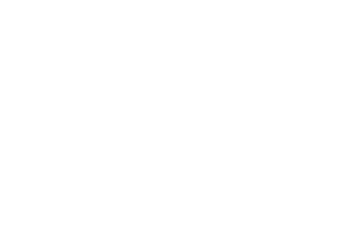

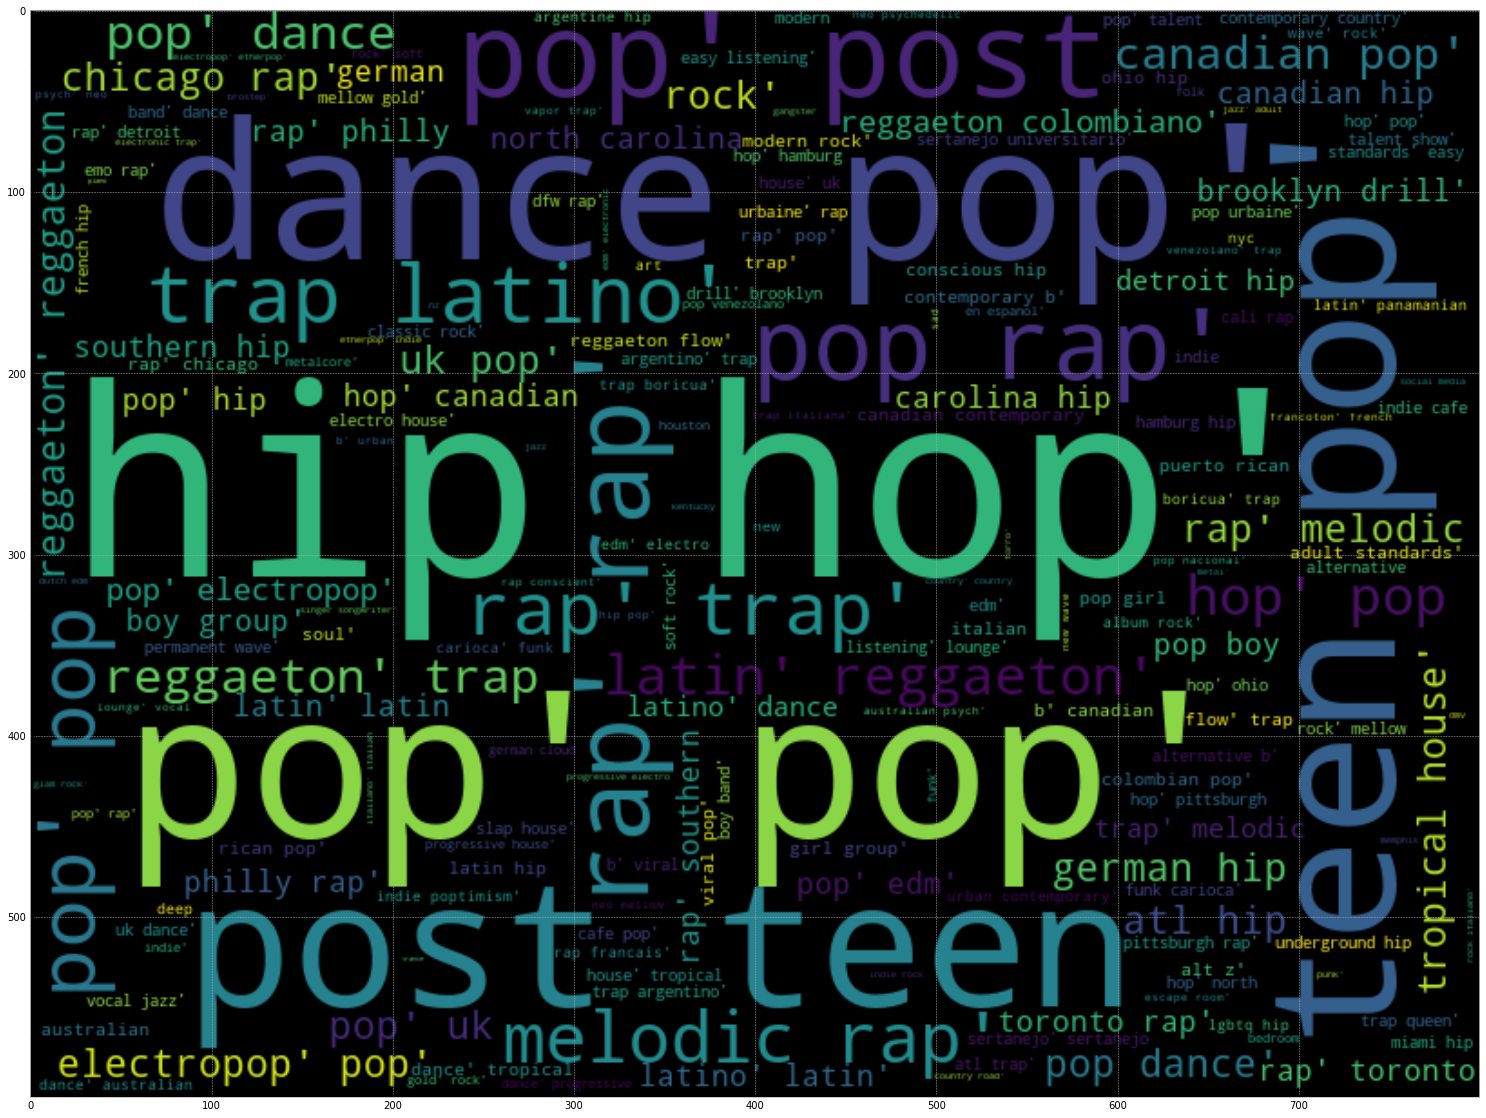

In [ ]:
# Generating word cloud for genre: Research question 2:

df["Genre_New"] = df["Genre"].apply(lambda x: x.replace('[','').replace(']',''))
df["Genre_New"]
text = (" ").join(x for x in df["Genre_New"].astype(str))
stopwords = set(STOPWORDS)
stopwords.update(["NULL"])
wordcloud = WordCloud(stopwords=stopwords, background_color="black",width = 800,height=600).generate(text)
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

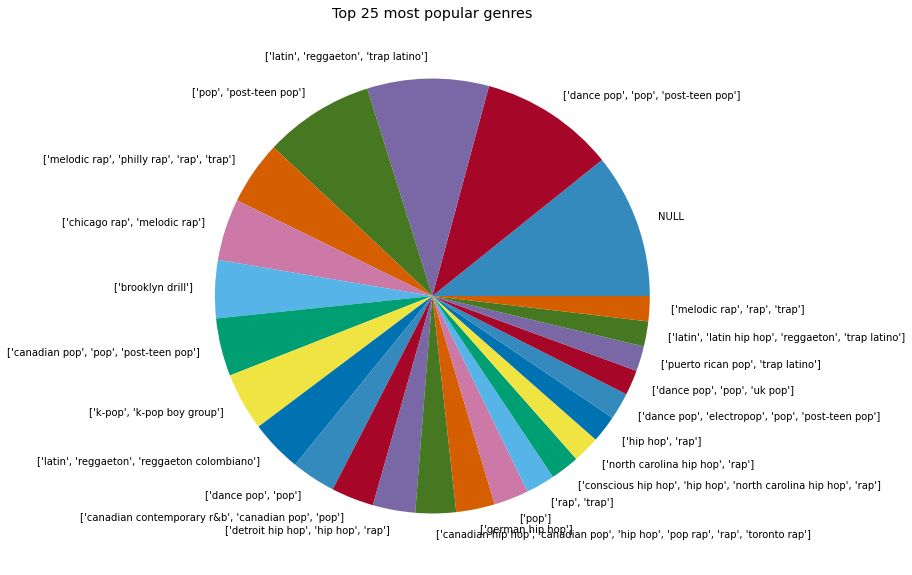

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
df.Genre.value_counts()[:25].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top 25 most popular genres")
plt.show()

In [ ]:
df_numbercharted=df.groupby('Artist').sum().sort_values('Number of Times Charted', ascending=False)
df_numbercharted=df_numbercharted.reset_index()
df_numbercharted

,Artist,Highest Charting Position,Number of Times Charted,Streams,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,timestamp_reldate
0,Billie Eilish,1136,432,97575714,707.0,10.786,5.761,-207.037,2.5197,12.22100,2.8004,2217.721,3783701.0,5.1466,2.888041e+10
1,Juice WRLD,1755,431,166703004,2210.0,18.599,17.872,-212.933,3.9328,8.43735,5.8540,3856.514,5333179.0,11.9614,4.765764e+10
2,Harry Styles,139,364,32082208,415.0,2.814,3.313,-27.808,0.2124,1.23390,0.7980,546.299,1002386.0,1.7092,7.880976e+09
3,Ed Sheeran,657,314,80580568,670.0,6.563,5.089,-55.129,0.5589,2.93310,1.4298,907.146,2076469.0,4.8130,1.371902e+10
4,Pop Smoke,2420,308,173634217,1970.0,20.081,18.583,-196.316,6.2924,6.64445,5.8263,3595.681,5186370.0,13.9520,4.651370e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,"Kane Brown, blackbear",187,1,5173178,80.0,0.434,0.889,-5.684,0.0509,0.39500,0.2730,113.326,153338.0,0.8450,1.625789e+09
698,Kehlani,177,1,4603243,68.0,0.574,0.791,-3.752,0.1100,0.41900,0.0982,119.537,167810.0,0.6120,1.588896e+09
699,Kontra K,129,1,5867111,62.0,0.751,0.783,-5.926,0.2200,0.07150,0.1140,94.003,189739.0,0.3790,1.600992e+09
700,"Kygo, Donna Summer",194,1,4569978,71.0,0.681,0.773,-5.749,0.1480,0.01900,0.1100,119.961,199008.0,0.4290,1.600387e+09


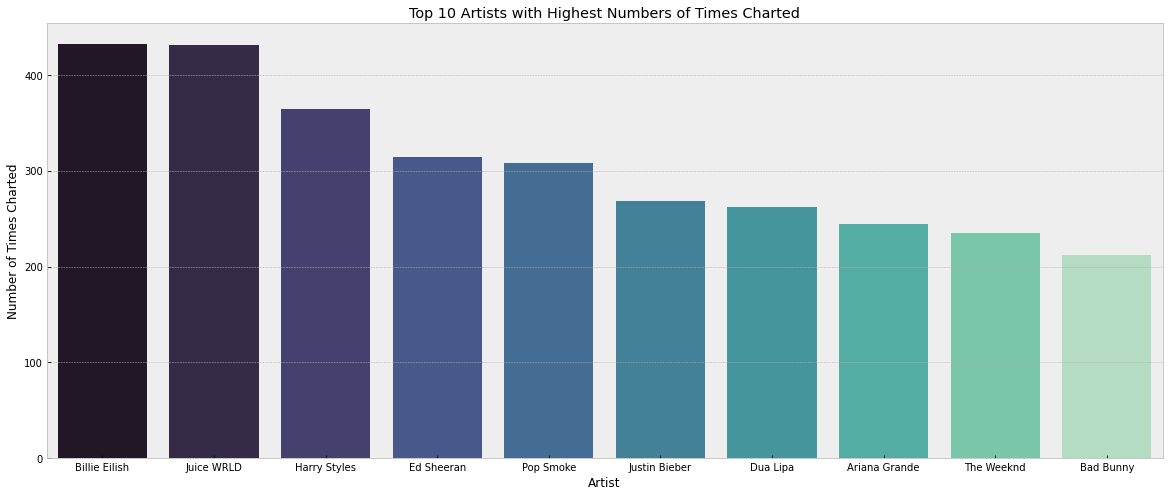

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Top 10 Artists with Highest Numbers of Times Charted")
sns.barplot(x='Artist',y='Number of Times Charted',data=df_numbercharted.head(10), palette="mako")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


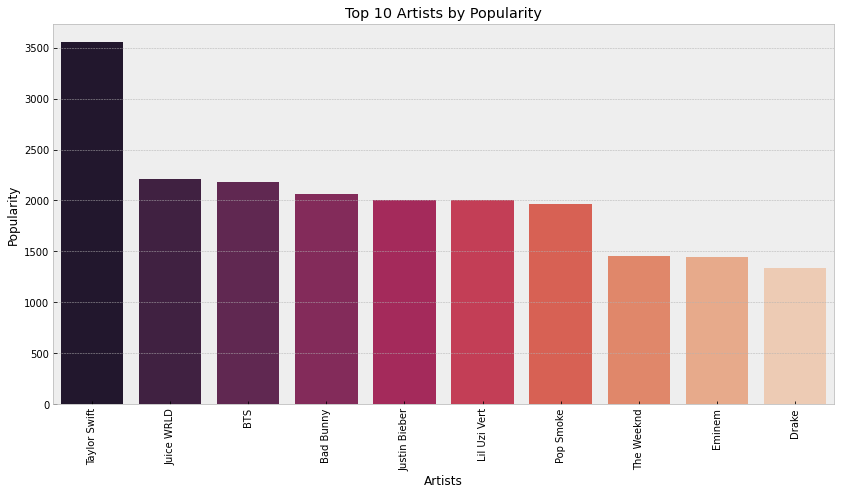

In [ ]:
plt.figure(figsize=(14,7))
plt.rcParams['figure.facecolor'] = 'white' 
artistsbypop = df.groupby("Artist")['Popularity'].sum().sort_values(ascending=False)[:10]
axis = sns.barplot(artistsbypop.index, artistsbypop,palette='rocket')
axis.set_title('Top 10 Artists by Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Artists')
plt.xticks(rotation = 90)
plt.show()